In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

data = pd.read_csv("/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Seeking for inconsistent data

In [2]:
data.describe() #indicates missing data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [3]:
data[data['Location'] == 'Albury']

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,2017-06-21,Albury,1.2,15.2,0.4,NaN,NaN,ENE,15.0,NaN,...,100.0,62.0,1029.4,1026.7,8.0,NaN,2.9,14.3,No,No
3036,2017-06-22,Albury,0.8,13.4,0.0,NaN,NaN,W,17.0,S,...,100.0,66.0,1029.4,1025.9,8.0,1.0,3.6,13.3,No,No
3037,2017-06-23,Albury,1.1,11.9,0.0,NaN,NaN,SE,44.0,SSE,...,100.0,81.0,1022.3,1017.7,8.0,1.0,2.7,10.2,No,No
3038,2017-06-24,Albury,1.1,14.1,0.2,NaN,NaN,WSW,28.0,SW,...,100.0,49.0,1018.8,1017.2,7.0,6.0,3.9,13.1,No,No


In [4]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
data['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [6]:
data['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [7]:
data['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [8]:
data['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [9]:
data['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [10]:
data['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

Filtering NA'S

In [11]:
data = data.dropna()

In [12]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [13]:
data = data.drop(["Date","Location"],axis=1)

In [14]:
WindGustDir = pd.get_dummies(data['WindGustDir'], prefix='wgdir', prefix_sep='_')
WindDir9am = pd.get_dummies(data['WindDir9am'], prefix='w9am', prefix_sep='_')
WindDir3pm = pd.get_dummies(data['WindDir3pm'], prefix='w3pm', prefix_sep='_')

In [15]:
data.RainToday = data.RainToday.replace(to_replace=['No', 'Yes'], value=[0, 1])
data.RainToday

/tmp/ipykernel_33/3614625683.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.RainToday = data.RainToday.replace(to_replace=['No', 'Yes'], value=[0, 1])


6049      0
6050      0
6052      0
6053      0
6054      0
         ..
142298    0
142299    0
142300    0
142301    0
142302    0
Name: RainToday, Length: 56420, dtype: int64

In [16]:
data.RainTomorrow = data.RainTomorrow.replace(to_replace=['No', 'Yes'], value=[0, 1])

/tmp/ipykernel_33/1643225467.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.RainTomorrow = data.RainTomorrow.replace(to_replace=['No', 'Yes'], value=[0, 1])


In [17]:
data = data.drop(["WindGustDir","WindDir9am","WindDir3pm"],axis=1)
data.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [18]:
data_Master = pd.concat([data,
                          WindGustDir,
                          WindDir9am,
                         WindDir3pm
                         ], axis=1)

data_Master.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,w3pm_NNW,w3pm_NW,w3pm_S,w3pm_SE,w3pm_SSE,w3pm_SSW,w3pm_SW,w3pm_W,w3pm_WNW,w3pm_WSW
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,...,False,False,False,False,False,False,True,False,False,False
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,...,False,False,False,False,True,False,False,False,False,False
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,...,True,False,False,False,False,False,False,False,False,False
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,False,False,False,False,False,False,False,False,False,True
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,False,False,False,False,False,False,False,False,True,False


In [19]:
data_Master.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'wgdir_E',
       'wgdir_ENE', 'wgdir_ESE', 'wgdir_N', 'wgdir_NE', 'wgdir_NNE',
       'wgdir_NNW', 'wgdir_NW', 'wgdir_S', 'wgdir_SE', 'wgdir_SSE',
       'wgdir_SSW', 'wgdir_SW', 'wgdir_W', 'wgdir_WNW', 'wgdir_WSW', 'w9am_E',
       'w9am_ENE', 'w9am_ESE', 'w9am_N', 'w9am_NE', 'w9am_NNE', 'w9am_NNW',
       'w9am_NW', 'w9am_S', 'w9am_SE', 'w9am_SSE', 'w9am_SSW', 'w9am_SW',
       'w9am_W', 'w9am_WNW', 'w9am_WSW', 'w3pm_E', 'w3pm_ENE', 'w3pm_ESE',
       'w3pm_N', 'w3pm_NE', 'w3pm_NNE', 'w3pm_NNW', 'w3pm_NW', 'w3pm_S',
       'w3pm_SE', 'w3pm_SSE', 'w3pm_SSW', 'w3pm_SW', 'w3pm_W', 'w3pm_WNW',
       'w3pm_WSW'],
      dtype='object')

Split

In [20]:
from sklearn.model_selection import train_test_split
Train, Validation = train_test_split(data_Master, test_size = 0.2)

X_train = Train.drop(['RainTomorrow'], axis=1)
Y_train = Train["RainTomorrow"]
X_test = Validation.drop(['RainTomorrow'], axis=1)
Y_test = Validation["RainTomorrow"]

Y_test = Y_test.reset_index().drop('index',axis = 1)
Y_train = Y_train.reset_index().drop('index',axis = 1)

In [43]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing features
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_normalized, Y_train.values.ravel())

RandomForestClassifier(random_state=42)

In [45]:
print(accuracy_score(Y_test.values.ravel(), rf.predict(X_test_normalized)))


0.8619283941864587


In [46]:
print(classification_report(Y_test.values.ravel(), rf.predict(X_test_normalized)))


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      8773
           1       0.78      0.53      0.63      2511

    accuracy                           0.86     11284
   macro avg       0.83      0.74      0.77     11284
weighted avg       0.86      0.86      0.85     11284



Verificando o Surrogate Model

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [48]:

X_test_pca = pca.fit_transform(X_test)
X_test_pca = pca.transform(X_test)
X_test_pca

array([[-44.50896582,  27.80466988],
       [-27.89159192,  19.09793956],
       [  5.81524986,  -6.20940056],
       ...,
       [ 20.21499776,   4.75897311],
       [  8.27431926, -16.28777635],
       [ 27.69381687,  40.69681081]])

In [49]:
pca.explained_variance_ratio_

array([0.4813482 , 0.20069175])

In [78]:
rf_preds = pd.DataFrame({"var1":X_test_pca[:,0],"var2":X_test_pca[:,1],"preds":rf.predict(X_test_normalized)})

Modelo Principal, mapa de classificação usando scatter plot

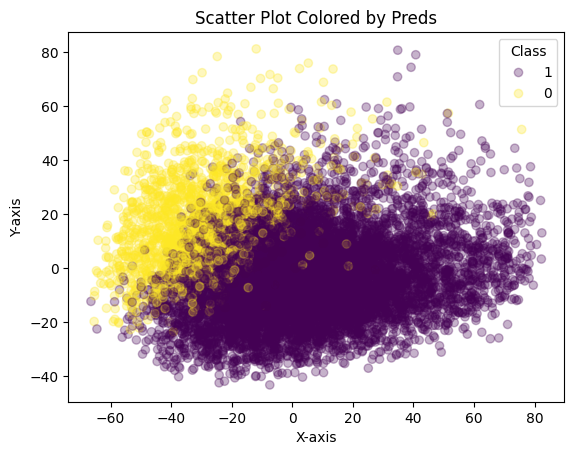

In [97]:
import matplotlib.pyplot as plt

# Create a dictionary to map class labels to colors
unique_classes = rf_preds['preds'].unique()


# Scatter plot with labels for legend
scatter = plt.scatter(rf_preds['var1'], rf_preds['var2'], c=rf_preds['preds'], alpha=0.3)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot Colored by Preds')

# Add legend with class labels
legend_labels = [class_label for class_label in unique_classes]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Class')

# Show the plot
plt.show()

Decision Tree Surrogate

In [98]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3,min_samples_leaf = 30)

dt.fit(X_test, rf.predict(X_test_normalized))#fitting the decision tree on predicted values

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=30)

In [104]:
# Assuming y_train contains the target variable
unique_classes = np.unique(Y_train)
class_names = list(unique_classes)
class_names

[0, 1]

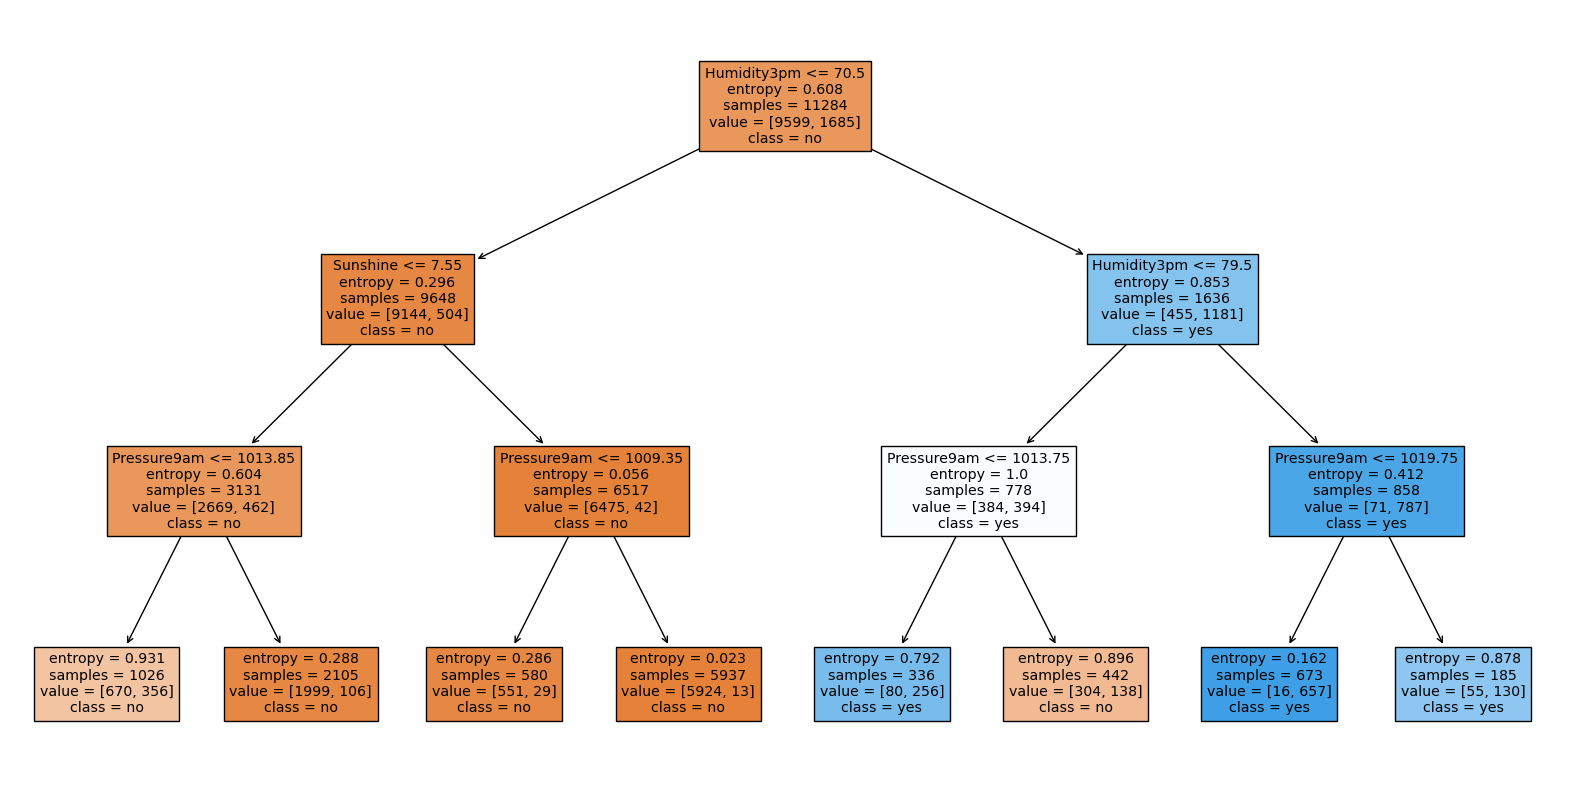

In [106]:
from sklearn import tree
plt.figure(figsize=(20, 10))  # Adjust the size as needed
tree.plot_tree(dt, feature_names = X_test.columns, class_names=['no', "yes"],filled = True);


é possível verificar a relação com a humidade, note e a humidade alta <80% indica que há uma maior propensão de chuva no próximo dia.

In [100]:
dt_preds = pd.DataFrame({"var1":X_test_pca[:,0],"var2":X_test_pca[:,1],"preds":dt.predict(X_test)})

In [101]:
dt_preds

,var1,var2,preds
0,-44.508966,27.804670,1
1,-27.891592,19.097940,0
2,5.815250,-6.209401,0
3,-7.450387,-26.720946,0
4,79.602379,-6.323899,0
...,...,...,...
11279,-14.353492,-20.159631,0
11280,39.803971,-13.068759,0
11281,20.214998,4.758973,0
11282,8.274319,-16.287776,0


Mapa da Classificação do surrogate model usando scatter plot

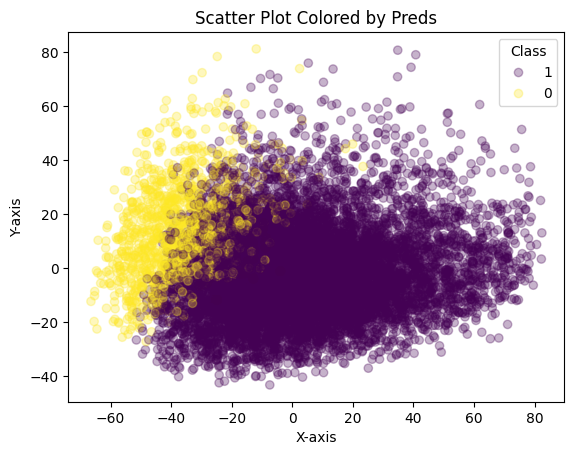

In [102]:
import matplotlib.pyplot as plt

# Create a dictionary to map class labels to colors
unique_classes = dt_preds['preds'].unique()


# Scatter plot with labels for legend
scatter = plt.scatter(dt_preds['var1'], dt_preds['var2'], c=dt_preds['preds'], alpha=0.3)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot Colored by Preds')

# Add legend with class labels
legend_labels = [class_label for class_label in unique_classes]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Class')

# Show the plot
plt.show()

Fica constatado que há uma boa aproximação feita pelo modelo de Arvore de decisão com 3 níveis.